## Resampling
### Definition: Resampling refers to the process of converting a time series from one frequency to another.
#### Aggregating higher frequency data to lower frequency is called down-sampling, while converting lower frequency to higher frequency is called up-sampling.

### Up-sampling

In [6]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt

In [7]:
rng = pd.date_range('2000-01-01', periods = 100, freq = 'D')
rng

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14', '2000-01-15', '2000-01-16',
               '2000-01-17', '2000-01-18', '2000-01-19', '2000-01-20',
               '2000-01-21', '2000-01-22', '2000-01-23', '2000-01-24',
               '2000-01-25', '2000-01-26', '2000-01-27', '2000-01-28',
               '2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03', '2000-02-04', '2000-02-05',
               '2000-02-06', '2000-02-07', '2000-02-08', '2000-02-09',
               '2000-02-10', '2000-02-11', '2000-02-12', '2000-02-13',
               '2000-02-14', '2000-02-15', '2000-02-16', '2000-02-17',
               '2000-02-18', '2000-02-19', '2000-02-20', '2000-02-21',
               '2000-02-22', '2000-02-23', '2000-02-24', '2000-02-25',
      

In [8]:
ts = pd.Series(np.random.randn(len(rng)), index = rng)
ts

2000-01-01   -1.354030
2000-01-02   -0.002991
2000-01-03   -0.327707
2000-01-04   -0.649361
2000-01-05   -0.875802
                ...   
2000-04-05   -0.417675
2000-04-06    0.662261
2000-04-07   -0.568055
2000-04-08    0.562464
2000-04-09    2.411751
Freq: D, Length: 100, dtype: float64

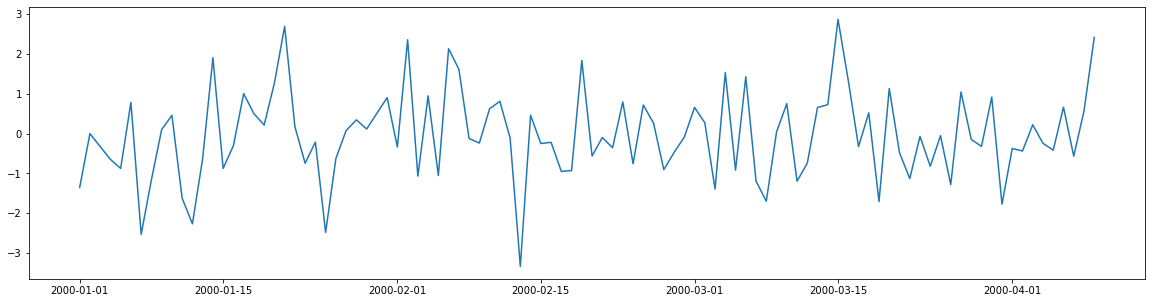

In [39]:
plt.figure(figsize = (20, 5))
plt.plot(ts)

#### Plotting using plotly for better appealing visuals.

In [60]:
import plotly.express as px
import plotly.graph_objects as go

In [72]:
line = px.line(ts, x = ts.index, y = ts[0], title = 'Time-series Data Pre-Sampling', height = 500, width = 900)
line.update_layout(
    margin=dict(l=20, r=20, t=40, b=20),
    paper_bgcolor="white", #LightSteelBlue
)
# line.show()

#### Post Up-sampling

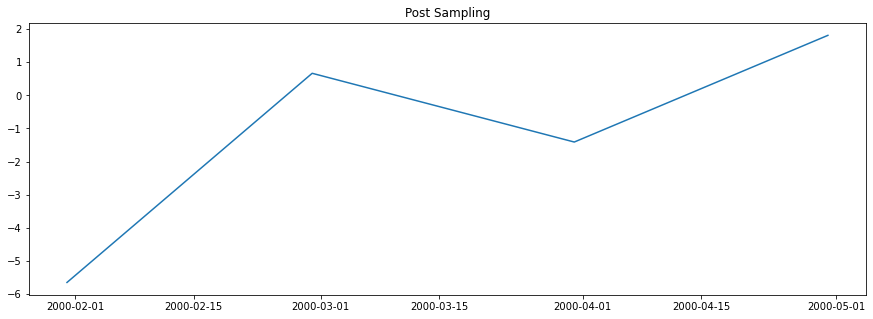

In [83]:
plt.figure(figsize = (15, 5))
plt.title('Post Sampling')
plt.plot(ts.resample('M').sum())

##### Using plotly

In [84]:
new_sample_mean_px = ts.resample('M').sum()

In [85]:
line = px.line(ts, x = new_sample_mean_px.index, y = new_sample_mean_px[0], title = 'Time-series Data Post-Upsampling', height = 500, width = 900)
line.update_layout(
    margin=dict(l=20, r=20, t=40, b=20),
    paper_bgcolor="LightSteelBlue",
)

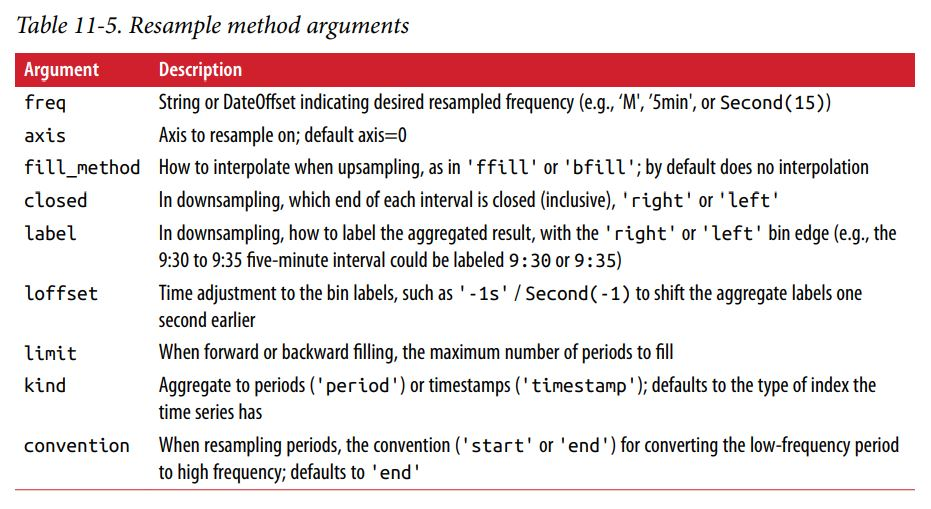

### Down-sampling

#### There are a couple things to think about when using resample to downsample data:

• Which side of each interval is closed

• How to label each aggregated bin, either with the start of the interval or the end

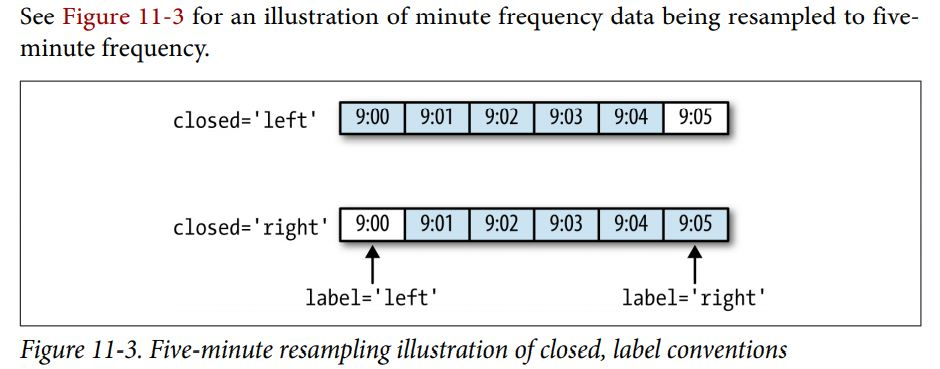

In [107]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts1 = pd.Series(np.arange(12), index=rng)
ts2 = pd.Series(np.arange(12), index=rng)
ts1

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [108]:
ts2

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [111]:
ts1.resample('5min', closed='left', label='left', loffset='-1s').sum()

1999-12-31 23:59:59    10
2000-01-01 00:04:59    35
2000-01-01 00:09:59    21
Freq: 5T, dtype: int32

In [112]:
ts2.resample('5min', closed='right', label='left', loffset='-1s').sum()

1999-12-31 23:54:59     0
1999-12-31 23:59:59    15
2000-01-01 00:04:59    40
2000-01-01 00:09:59    11
Freq: 5T, dtype: int32

##### Finance Data Setup

In [146]:
ts1_finance = ts1.resample('5min').ohlc()
ts1_finance

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11
